<a href="https://colab.research.google.com/github/akmalmnaim/ML_284_281/blob/main/ANN_284_281.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd gdrive/MyDrive/Praktikum ML/Project Kelompok

/content/gdrive/MyDrive/Praktikum ML/Project Kelompok


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akmalmnaim12","key":"56eec82db5f45bfb0998ac4381f0633f"}'}

In [ ]:
!mkdir .kaggle

In [ ]:
!cp kaggle.json /.kaggle

In [ ]:
cd

/root


In [ ]:
api_token = {"username":"akmalmnaim12","key":"56eec82db5f45bfb0998ac4381f0633f"}
import json
import zipfile
import os
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:31<00:00, 75.9MB/s]
100% 2.29G/2.29G [00:31<00:00, 77.6MB/s]


In [ ]:
ls

 chest_xray/   chest-xray-pneumonia.zip  'Project Kelompok.ipynb'


In [5]:
import os
import zipfile


In [ ]:

local_zip = 'chest-xray-pneumonia.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('')
zip_ref.close()

In [ ]:
ls

 chest_xray/   chest-xray-pneumonia.zip  'Project Kelompok.ipynb'


In [6]:
base_dir = 'chest_xray'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_normal_dir = os.path.join(train_dir, 'NORMAL')
train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')

val_normal_dir = os.path.join(val_dir, 'NORMAL')
val_pneumonia_dir = os.path.join(val_dir, 'PNEUMONIA')

test_normal_dir = os.path.join(test_dir, 'NORMAL')
test_pneumonia_dir = os.path.join(test_dir, 'PNEUMONIA')

In [7]:
# Cek penamaan image yang ada di folder train_normal_dir dan train_pneumonia_dir
print(os.listdir(train_normal_dir)[:10])
print(os.listdir(train_pneumonia_dir)[:10])

['IM-0524-0001.jpeg', 'IM-0525-0001-0001.jpeg', 'IM-0525-0001-0002.jpeg', 'IM-0525-0001.jpeg', 'IM-0526-0001.jpeg', 'IM-0527-0001.jpeg', 'IM-0528-0001.jpeg', 'IM-0529-0001.jpeg', 'IM-0530-0001.jpeg', 'IM-0531-0001-0001.jpeg']
['person540_bacteria_2271.jpeg', 'person540_bacteria_2272.jpeg', 'person540_bacteria_2273.jpeg', 'person540_virus_1070.jpeg', 'person541_bacteria_2274.jpeg', 'person541_bacteria_2275.jpeg', 'person541_virus_1071.jpeg', 'person542_bacteria_2276.jpeg', 'person542_virus_1072.jpeg', 'person543_bacteria_2279.jpeg']


In [8]:
# Cek jumlah data train dan data validation
print('total training normal images:', len(os.listdir(train_normal_dir)))
print('total training pneumonia images:', len(os.listdir(train_pneumonia_dir)))
print('total val normal images:', len(os.listdir(val_normal_dir)))
print('total val pneumonia images:', len(os.listdir(val_pneumonia_dir)))
print('total test normal images:', len(os.listdir(test_normal_dir)))
print('total test pneumonia images:', len(os.listdir(test_pneumonia_dir)))

total training normal images: 1341
total training pneumonia images: 3875
total val normal images: 8
total val pneumonia images: 8
total test normal images: 234
total test pneumonia images: 390


In [9]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (250,250))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [10]:
# Gather data train
val_data = []
val_label = []
for r, d, f in os.walk(val_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (250,250))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [11]:
# Gather data train
test_data = []
test_label = []
for r, d, f in os.walk(test_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (250,250))
            test_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            test_label.append(label)

test_data = np.array(train_data)
test_label = np.array(train_label)

In [12]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)
print("Test Data = ", test_data.shape)
print("Test Label = ", test_label.shape)

Train Data =  (5216, 250, 250, 3)
Train Label =  (5216,)
Validation Data =  (16, 250, 250, 3)
Validation Label =  (16,)
Test Data =  (5216, 250, 250, 3)
Test Label =  (5216,)


In [13]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
x_test = test_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [0 0 0]
Data setelah di-normalisasi  [0. 0. 0.]


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, AveragePooling2D, Flatten, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras import layers
from tensorflow.keras import Model

In [15]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[1:10])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)
y_test = lb.fit_transform(test_label)

print("Label setelah di-encoder ", y_train[1:10])

Label sebelum di-encoder  ['NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL'
 'NORMAL']
Label setelah di-encoder  [0 0 0 0 0 0 0 0 0]


In [22]:
#ANN
# Buat model dengan 3 input layer, 1 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(250, 250, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 150x150x3 menjadi vektor
x = layers.Dense(32, activation='relu')(x) # hidden layer 1 dengan 128 neuron
x = layers.Dense(64, activation='relu')(x) # hidden layer 1 dengan 128 neuron
x = layers.Dense(128, activation='relu')(x) # hidden layer 1 dengan 128 neuron
x = layers.Dense(64, activation='relu')(x) # hidden layer 1 dengan 128 neuron
x = layers.Dense(32, activation='relu')(x) # hidden layer 1 dengan 128 neuron

output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)

In [23]:
# Summary Scenario Pertama
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
flatten (Flatten)            (None, 187500)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                6000032   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080  

In [24]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

In [25]:
H2 = model.fit(x_train, y_train, batch_size=20, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
261/261 [==============================] - 13s 44ms/step - loss: 0.5601 - acc: 0.8319 - val_loss: 0.5274 - val_acc: 0.7500
Epoch 2/10
261/261 [==============================] - 11s 42ms/step - loss: 0.2055 - acc: 0.9178 - val_loss: 0.4172 - val_acc: 0.8750
Epoch 3/10
261/261 [==============================] - 11s 42ms/step - loss: 0.1692 - acc: 0.9360 - val_loss: 0.2431 - val_acc: 0.9375
Epoch 4/10
261/261 [==============================] - 11s 42ms/step - loss: 0.1776 - acc: 0.9312 - val_loss: 0.3527 - val_acc: 0.9375
Epoch 5/10
261/261 [==============================] - 11s 42ms/step - loss: 0.1390 - acc: 0.9492 - val_loss: 0.1715 - val_acc: 0.9375
Epoch 6/10
261/261 [==============================] - 11s 42ms/step - loss: 0.1212 - acc: 0.9557 - val_loss: 0.3071 - val_acc: 0.9375
Epoch 7/10
261/261 [==============================] - 11s 42ms/step - loss: 0.1451 - acc: 0.9446 - val_loss: 0.5779 - val_acc: 0.8125
Epoch 8/10
261/261 [==============================] - 11s 42ms

In [ ]:
ls

 chest_xray/   chest-xray-pneumonia.zip  'Project Kelompok.ipynb'


In [ ]:
model.save('Project Kelompok')

INFO:tensorflow:Assets written to: Project Kelompok/assets


In [ ]:
model.save("model.h5")

In [ ]:
ls

 chest_xray/                model2.h5           'Project Kelompok.ipynb'
 chest-xray-pneumonia.zip  'Project Kelompok'/


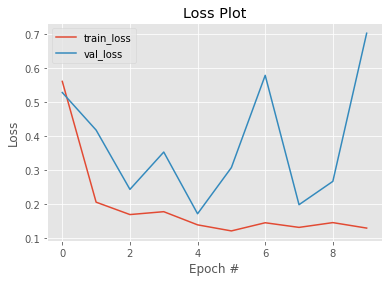

<Figure size 432x288 with 0 Axes>

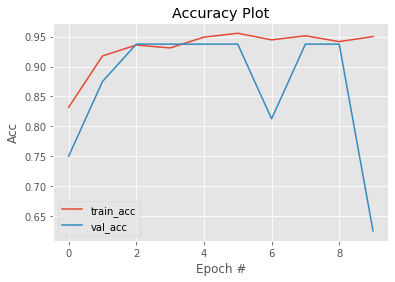

In [26]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), H2.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), H2.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

plt.figure()

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), H2.history["acc"], label="train_acc")
plt.plot(np.arange(0, 10), H2.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import classification_report

pred = model.predict(x_test)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_test, labels))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86      1341
           1       0.93      1.00      0.96      3875

    accuracy                           0.94      5216
   macro avg       0.95      0.88      0.91      5216
weighted avg       0.94      0.94      0.93      5216

